<a href="https://colab.research.google.com/github/kemaldoguoktay/hmgs-analiz/blob/main/hmgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Giriş

Kütüphaneler indirildi.

In [1033]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

Esas csv okundu.

In [1034]:
df = pd.read_csv('hmgs.csv')

## Veri Önişlemesi

Gereksiz sütunlar kaldırıldı.

In [1035]:
df = df.drop(columns=["Zaman damgası"])

In [1036]:
df_copy = df.copy()

In [1037]:
df.tail(3)

,Üniversite,Üniversite Ortalaması,Üniversitenin İngilizce Oranı,HMGS Notunuz,Eğitim Destek Durumu,Hangi Dershane (Varsa)?,Aylık Gelir Durumu,Konaklama Durumu,Sınava Ne Kadar Süre Hazırlandınız?,Günlük Ortalama Ders Çalışma Saatiniz,Sınavın soru kalitesi sizce nasıldı?
97,Doğuş Üniversitesi,"2,66",%0,73,Dershane aldım,Yetki Uzem,"0-10,000 TL",Aile evi,1-3 ay,5,4
98,Kırıkkale,2.75,%0,84,Dershane aldım,Monopol,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4-6 saat,3
99,Hacettepe Üniversitesi,2.90,%0,68,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,6,3


Sütun isimleri düzenlendi.

In [1038]:
column_names = ["üni","üni_ort","üni_ing","hmgs","destek","dershane_adı","gelir","konak","süre","calisma","kalite"]
df.columns = column_names

Üniversite isimleri küçük harf yapıldı.

In [1039]:
for i in range(len(df.üni)):
  df["üni"][i] = df["üni"][i].lower()

Üniversitelerin isimleri eşleştirilebilecek şekilde düzenlendi.

In [1040]:
for i in range(len(df.üni)):
  if "aydın" in df["üni"][i]:
    df["üni"][i] = "aydın üniversitesi"

In [1041]:
for i in range(len(df.üni)):
  if "i̇aü" in df["üni"][i]:
    df["üni"][i] = "aydın üniversitesi"

In [1042]:
for i in range(len(df.üni)):
  if "i̇nönü" in df["üni"][i]:
    df["üni"][i] = "inönü üniversitesi"

In [1043]:
for i in range(len(df.üni)):
  if "beykent" in df["üni"][i]:
    df["üni"][i] = "beykent üniversitesi"

In [1044]:
for i in range(len(df.üni)):
  if "dokuz eylül" in df["üni"][i]:
    df["üni"][i] = "dokuz eylül üniversitesi"

In [1045]:
for i in range(len(df.üni)):
  if "marmara" in df["üni"][i]:
    df["üni"][i] = "marmara üniversitesi"

In [1046]:
for i in range(len(df.üni)):
  if "uludağ" in df["üni"][i]:
    df["üni"][i] = "bursa uludağ üniversitesi"

In [1047]:
for i in range(len(df.üni)):
  if "ankara hukuk" in df["üni"][i]:
    df["üni"][i] = "ankara üniversitesi"

In [1048]:
for i in range(len(df.üni)):
  if "ankara üniversitesi" in df["üni"][i]:
    df["üni"][i] = "ankara üniversitesi"

In [1049]:
for i in range(len(df.üni)):
  if "süleyman demirel" in df["üni"][i]:
    df["üni"][i] = "süleyman demirel üniversitesi"

In [1050]:
for i in range(len(df.üni)):
  if "selçuk üniversitesi" in df["üni"][i]:
    df["üni"][i] = "selçuk üniversitesi"

In [1051]:
for i in range(len(df.üni)):
  if "sabahattin zaim" in df["üni"][i]:
    df["üni"][i] = "sabahattin zaim üniversitesi"

In [1052]:
for i in range(len(df.üni)):
  if "i̇stanbul üniversitesi hukuk fakültesi" in df["üni"][i]:
    df["üni"][i] = "istanbul üniversitesi"

In [1053]:
for i in range(len(df.üni)):
  if "i̇stanbul üniversitesi" in df["üni"][i]:
    df["üni"][i] = "istanbul üniversitesi"

In [1054]:
df.üni.value_counts().head(5)

,count
üni,
inönü üniversitesi,20
aydın üniversitesi,18
beykent üniversitesi,13
ankara üniversitesi,5
istanbul üniversitesi,4


In [1055]:
df.tail(2)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
98,kırıkkale,2.75,%0,84,Dershane aldım,Monopol,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4-6 saat,3
99,hacettepe üniversitesi,2.90,%0,68,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,6,3


Türkçe İngilizce farklılığından oluşan nokta virgül farkı düzeltildi.

In [1056]:
for i in range(len(df.üni_ort)):
  df.üni_ort[i] = df.üni_ort[i].replace(",",".")

In [1057]:
df.tail(5)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
95,i.d. bilkent universitesi,3.02,%25,67,Destek almadım,NaN,"41,000 ve üstü",Kendi evimde/arkadaşlarımla kalıyorum,1 aydan az,5-6,1
96,istanbul bilgi üniversitesi,3.02,%25,65,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,5,2
97,doğuş üniversitesi,2.66,%0,73,Dershane aldım,Yetki Uzem,"0-10,000 TL",Aile evi,1-3 ay,5,4
98,kırıkkale,2.75,%0,84,Dershane aldım,Monopol,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4-6 saat,3
99,hacettepe üniversitesi,2.90,%0,68,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,6,3


Üniversite Ortalaması adlı sütun Float türüne çevirildi.

In [1058]:
for i in range(len(df.üni_ort)):
  df.üni_ort[i] = float(df.üni_ort[i])

Üniversite Ortalamasını 100 üzerinden hesaplayan öğrencilerin notları 4 üzerinden hesaplandı.

In [1059]:
for i in range(len(df.üni_ort)):
  if df.üni_ort[i]>4:
    print(df.üni_ort[i])
    df.üni_ort[i] = (df.üni_ort[i]/100)*4
    print("--"*30)
    print(df.üni_ort[i])

79.0
------------------------------------------------------------
3.16
79.0
------------------------------------------------------------
3.16
95.4
------------------------------------------------------------
3.8160000000000003
70.0
------------------------------------------------------------
2.8


In [1060]:
df.tail(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
97,doğuş üniversitesi,2.66,%0,73,Dershane aldım,Yetki Uzem,"0-10,000 TL",Aile evi,1-3 ay,5,4
98,kırıkkale,2.75,%0,84,Dershane aldım,Monopol,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4-6 saat,3
99,hacettepe üniversitesi,2.9,%0,68,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,6,3


HMGS adlı sütundaki veriler Integer tipine çevirildi.

In [1061]:
df.hmgs = df.hmgs.astype(int)

In [1062]:
df.head(2).hmgs

,hmgs
0,80
1,44


In [1063]:
df.tail(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
97,doğuş üniversitesi,2.66,%0,73,Dershane aldım,Yetki Uzem,"0-10,000 TL",Aile evi,1-3 ay,5,4
98,kırıkkale,2.75,%0,84,Dershane aldım,Monopol,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4-6 saat,3
99,hacettepe üniversitesi,2.9,%0,68,Destek almadım,NaN,"0-10,000 TL",Aile evi,1 aydan az,6,3


In [1064]:
df.dershane_adı.value_counts()

,count
dershane_adı,
Yok,4
Yetkiuzem,3
Hakimlik akademisi,2
Monopol,2
Hukuki yeterlilik akademisi,1
Yetki,1
Yetki uzan,1
Themis,1
Yetki uzem,1


In [1065]:
df_copy = df.copy()

Dershane isimleri adlı sütun String tipine çevirildi.

In [1066]:
df.dershane_adı = df.dershane_adı.astype(str)

Dershane isimleri adlı sütundaki verilerin her biri küçük harfe çevirildi.

In [1067]:
for i in range(len(df.dershane_adı)):
  df.dershane_adı[i] = df.dershane_adı[i].lower()

In [1068]:
df.dershane_adı.value_counts()

,count
dershane_adı,
nan,79
yok,5
yetkiuzem,3
hakimlik akademisi,2
yetki uzem,2
monopol,2
hukuki yeterlilik akademisi,1
yetki,1
yetki uzan,1


nan olan değerler yok olarak değiştirildi.

In [1069]:
for i in range(len(df.dershane_adı)):
  if "yok" in df.dershane_adı[i]:
    df.dershane_adı[i] = "nan"

In [1070]:
for i in range(len(df.dershane_adı)):
  if "nan" in df.dershane_adı[i]:
    df.dershane_adı[i] = "yok"

In [1071]:
df.dershane_adı.value_counts()

,count
dershane_adı,
yok,85
yetkiuzem,3
hakimlik akademisi,2
yetki uzem,2
monopol,2
hukuki yeterlilik akademisi,1
yetki,1
yetki uzan,1
themis,1


Dershane isimleri düzenlendi.

In [1072]:
for i in range(len(df.dershane_adı)):
  if "yetki" in df.dershane_adı[i]:
    df.dershane_adı[i] = "yetki uzem"

In [1073]:
df.dershane_adı.value_counts()

,count
dershane_adı,
yok,85
yetki uzem,8
hakimlik akademisi,2
monopol,2
hukuki yeterlilik akademisi,1
themis,1
hakimlik akademisi,1


In [1074]:
df.tail(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
97,doğuş üniversitesi,2.66,%0,73,Dershane aldım,yetki uzem,"0-10,000 TL",Aile evi,1-3 ay,5,4
98,kırıkkale,2.75,%0,84,Dershane aldım,monopol,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4-6 saat,3
99,hacettepe üniversitesi,2.9,%0,68,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,6,3


In [1075]:
df.calisma.value_counts()

,count
calisma,
4,14
6,12
5,9
3,9
7,8
8,5
1,5
2,5
3-4,4


Eksik bilgi olan satırlar kaldırıldı.

In [1076]:
for i in range(len(df.calisma)):
  if "sınavdan önceki 4 gün çalıştım" in df.calisma[i]:
    print(df.iloc[i, :])

üni                         ankara üniversitesi
üni_ort                                    3.24
üni_ing                                      %0
hmgs                                         61
destek                           Destek almadım
dershane_adı                                yok
gelir                            41,000 ve üstü
konak                                  Aile evi
süre                                 1 aydan az
calisma         sınavdan önceki 4 gün çalıştım 
kalite                                        3
Name: 70, dtype: object


In [1077]:
df = df.drop(70)

In [1078]:
df.shape

(99, 11)

In [1079]:
df = df.reset_index(drop=True)

In [1080]:
df.calisma.value_counts()

,count
calisma,
4,14
6,12
3,9
5,9
7,8
2,5
1,5
8,5
3-4,4


Çalışma saatleri adlı sütundaki veriler düzenlendi.

In [1081]:
for i in range(len(df.calisma)):
  if "saat" in df.calisma[i]:
    df.calisma[i] = df.calisma[i].replace("saat","")

In [1082]:
for i in range(len(df.calisma)):
  if "-" in df.calisma[i]:
    df.calisma[i] = df.calisma[i][0]

In [1083]:
df.loc[df["calisma"]=="5 6", "calisma"] = 5.5

Karışmış üniversite isimleri düzenlendi.

In [1084]:
df.loc[df["üni"]=="deü", "üni"] = "dokuz eylül üniversitesi"

In [1085]:
df['üni'] = df['üni'].apply(lambda x: x.strip().lower().replace("i̇", "i") if isinstance(x, str) else x)

In [1086]:
df.loc[df["üni"]=='kocaeli', "üni"] = "kocaeli üniversitesi"
df.loc[df["üni"]=='i.d. bilkent universitesi', "üni"] = "ihsan doğramacı bilkent üniversitesi"

In [1087]:
df["üni"].value_counts()

,count
üni,
inönü üniversitesi,20
aydın üniversitesi,18
beykent üniversitesi,13
dokuz eylül üniversitesi,4
ankara üniversitesi,4
istanbul üniversitesi,4
bursa uludağ üniversitesi,3
kırıkkale,3
marmara üniversitesi,3


Çalışma saatleri adlı sütun Float tipine dönüştürüldü.

In [1088]:
df.calisma = df.calisma.astype(float)

In [1089]:
df.calisma.value_counts()

,count
calisma,
4.0,20
3.0,14
6.0,14
5.0,11
7.0,10
2.0,8
8.0,6
1.0,6
9.0,2


In [1090]:
for i in range(len(df.calisma)):
  if df.calisma[i] == 5.3:
    df.calisma[i] = 5.5

In [1091]:
df.shape

(99, 11)

In [1092]:
#df.drop_duplicates(inplace=True)

In [1093]:
df.tail(5)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
94,ihsan doğramacı bilkent üniversitesi,3.02,%25,67,Destek almadım,yok,"41,000 ve üstü",Kendi evimde/arkadaşlarımla kalıyorum,1 aydan az,5.0,1
95,istanbul bilgi üniversitesi,3.02,%25,65,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,5.0,2
96,doğuş üniversitesi,2.66,%0,73,Dershane aldım,yetki uzem,"0-10,000 TL",Aile evi,1-3 ay,5.0,4
97,kırıkkale,2.75,%0,84,Dershane aldım,monopol,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4.0,3
98,hacettepe üniversitesi,2.9,%0,68,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,6.0,3


NA value barındıran sütun olup olmadığı teyit edildi.

In [1094]:
df.isna().sum()

,0
üni,0
üni_ort,0
üni_ing,0
hmgs,0
destek,0
dershane_adı,0
gelir,0
konak,0
süre,0
calisma,0


Sayısal veriler Numeric olarak dönüştürüldü.

In [1095]:
df['hmgs'] = pd.to_numeric(df['hmgs'], errors='coerce')
df['üni_ort'] = pd.to_numeric(df['üni_ort'], errors='coerce')
df['kalite'] = pd.to_numeric(df['kalite'], errors='coerce')
df['calisma'] = pd.to_numeric(df['calisma'], errors='coerce')

In [1096]:
for i in df.gelir.value_counts().keys():
  print(i,",")

0-10,000 TL ,
10,001-20,000 TL ,
41,000 ve üstü ,
20,001-30,000 TL ,
30,001-40,000 TL ,


Gelir kategorilerini bir sıraya koydum.

In [1097]:
kategori_sırası = ["0-10,000 TL", "10,001-20,000 TL", "20,001-30,000 TL", "30,001-40,000 TL", "41,000 ve üstü"]
kategori_türü = pd.CategoricalDtype(categories=kategori_sırası, ordered=True)
df['gelir'] = df['gelir'].astype(kategori_türü)
df = df.sort_values(by='gelir', ascending=True)


In [1098]:
df.columns

Index(['üni', 'üni_ort', 'üni_ing', 'hmgs', 'destek', 'dershane_adı', 'gelir',
       'konak', 'süre', 'calisma', 'kalite'],
      dtype='object')

In [1099]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
49,aydın üniversitesi,2.21,%0,52,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,1.0,1
64,istanbul üniversitesi,3.90,%0,88,Destek almadım,yok,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,6.0,1
63,marmara üniversitesi,2.70,%0,80,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,12.0,1


Index sıraya göre değiştiği için index sıfırlandı.

In [1100]:
df.reset_index(drop=True, inplace=True)

In [1101]:
df.tail(5)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite
94,aydın üniversitesi,3.12,%0,70,Dershane aldım,yetki uzem,"41,000 ve üstü",Kendi evimde/arkadaşlarımla kalıyorum,1 aydan az,5.0,3
95,beykent üniversitesi,3.17,%0,80,Dershane aldım,themis,"41,000 ve üstü",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,6.0,4
96,aydın üniversitesi,3.43,%0,82,Destek almadım,yok,"41,000 ve üstü",Aile evi,1-3 ay,2.0,3
97,ankara üniversitesi,3.00,%0,84,Destek almadım,yok,"41,000 ve üstü",Aile evi,1-3 ay,8.0,3
98,aydın üniversitesi,3.07,%25,80,Destek almadım,yok,"41,000 ve üstü",Aile evi,1 aydan az,8.0,3


In [1102]:
df.shape

(99, 11)

Elde olan sütun sayıları kategorik değişkenler eklenerek arttırıldı.

In [1103]:
gecer = []

In [1104]:
for i in df["hmgs"]:
  if i >= 70:
    gecer.append("Geçti")
  else:
    gecer.append("Geçemedi")

In [1105]:
df.hmgs[2]

80

In [1106]:
df["gecer"] = gecer

In [1107]:
df.head(10)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer
0,aydın üniversitesi,2.21,%0,52,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,1.0,1,Geçemedi
1,istanbul üniversitesi,3.90,%0,88,Destek almadım,yok,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,6.0,1,Geçti
2,marmara üniversitesi,2.70,%0,80,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,12.0,1,Geçti
3,süleyman demirel üniversitesi,2.37,%0,69,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,2.0,2,Geçemedi
4,marmara üniversitesi,3.40,%0,79,Dershane aldım,monopol,"0-10,000 TL",Aile evi,1 aydan az,9.0,2,Geçti
5,akdeniz üniversitesi,2.54,%0,72,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,2.0,5,Geçti
6,marmara üniversitesi,2.70,%0,65,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,3.0,2,Geçemedi
7,ufuk üniversitesi,3.21,%25,83,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,4.0,2,Geçti
8,beykent üniversitesi,2.60,%0,71,Destek almadım,yok,"0-10,000 TL",Aile evi,3-6 ay,5.0,2,Geçti
9,bursa uludağ üniversitesi,2.57,%0,72,Destek almadım,yok,"0-10,000 TL",Yurtta kalıyorum,1-3 ay,4.0,3,Geçti


In [1108]:
for i in range(len(df.üni)):
  if "kırıkkale" in df.üni[i]:
    df.üni[i] = "kırıkkale üniversitesi"

In [1109]:
df.üni.unique()

array(['aydın üniversitesi', 'istanbul üniversitesi',
       'marmara üniversitesi', 'süleyman demirel üniversitesi',
       'akdeniz üniversitesi', 'ufuk üniversitesi',
       'beykent üniversitesi', 'bursa uludağ üniversitesi',
       'inönü üniversitesi', 'kırıkkale üniversitesi',
       'ankara üniversitesi', 'sabahattin zaim üniversitesi',
       'istanbul 29 mayıs üniversitesi', 'selçuk üniversitesi',
       'çankırı karatekin üniversitesi', 'lefke avrupa üniversitesi',
       'doğuş üniversitesi', 'istanbul bilgi üniversitesi',
       'hacı bayram veli', 'dicle üniversitesi',
       'dokuz eylül üniversitesi', 'istanbul ticaret üniversitesi',
       'necmettin erbakan', 'okan üniversitesi',
       'kırklareli üniversitesi', 'hacettepe üniversitesi',
       'kocaeli üniversitesi', 'istanbul okan üniversitesi',
       'kto karatay üniversitesi', 'koç üniversitesi',
       'ihsan doğramacı bilkent üniversitesi', 'gaziantep üniversitesi',
       'izmir ekonomi üniversitesi'], dtype=

In [1110]:
ort_yüksek_mi = []

In [1111]:
for i in df["üni_ort"]:
  if i > 3:
    ort_yüksek_mi.append("Evet")
  else:
    ort_yüksek_mi.append("Hayır")

In [1112]:
df["ort_yüksek_mi"] = ort_yüksek_mi

In [1113]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi
0,aydın üniversitesi,2.21,%0,52,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,1.0,1,Geçemedi,Hayır
1,istanbul üniversitesi,3.90,%0,88,Destek almadım,yok,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,6.0,1,Geçti,Evet
2,marmara üniversitesi,2.70,%0,80,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,12.0,1,Geçti,Hayır


In [1114]:
destek_var_mi = []

In [1115]:
for i in df["destek"]:
  if i=="Destek almadım":
    destek_var_mi.append("Hayır")
  else:
    destek_var_mi.append("Evet")

In [1116]:
df["destek_var_mi"] = destek_var_mi

In [1117]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi,destek_var_mi
0,aydın üniversitesi,2.21,%0,52,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,1.0,1,Geçemedi,Hayır,Hayır
1,istanbul üniversitesi,3.90,%0,88,Destek almadım,yok,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,6.0,1,Geçti,Evet,Hayır
2,marmara üniversitesi,2.70,%0,80,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,12.0,1,Geçti,Hayır,Hayır


In [1118]:
üni_ing_mi = []

In [1119]:
for i in df["üni_ing"]:
  if int(i[1:])>24:
    üni_ing_mi.append("Evet")
  else:
    üni_ing_mi.append("Hayır")

In [1120]:
df["üni_ing_mi"] = üni_ing_mi

In [1121]:
df.sample(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi
92,inönü üniversitesi,3.08,%0,65,Destek almadım,yok,"41,000 ve üstü",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,4.0,1,Geçemedi,Evet,Hayır,Hayır
43,istanbul üniversitesi,2.89,%0,90,Destek almadım,yok,"0-10,000 TL",Aile evi,1-3 ay,6.0,4,Geçti,Hayır,Hayır,Hayır
48,inönü üniversitesi,3.10,%0,75,Özel ders aldım,yok,"0-10,000 TL",Aile evi,1-3 ay,6.0,4,Geçti,Evet,Evet,Hayır


In [1122]:
df.süre.value_counts()

,count
süre,
1-3 ay,60
1 aydan az,33
3-6 ay,5
6 aydan fazla,1


In [1123]:
birden_fazla_ay = []

In [1124]:
for i in df["süre"]:
  if i == "1 aydan az":
    birden_fazla_ay.append("Hayır")
  else:
    birden_fazla_ay.append("Evet")

In [1125]:
df["birden_fazla_ay"] = birden_fazla_ay

In [1126]:
df.head(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi,birden_fazla_ay
0,aydın üniversitesi,2.21,%0,52,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,1.0,1,Geçemedi,Hayır,Hayır,Hayır,Hayır
1,istanbul üniversitesi,3.90,%0,88,Destek almadım,yok,"0-10,000 TL",Kendi evimde/arkadaşlarımla kalıyorum,1-3 ay,6.0,1,Geçti,Evet,Hayır,Hayır,Evet
2,marmara üniversitesi,2.70,%0,80,Destek almadım,yok,"0-10,000 TL",Aile evi,1 aydan az,12.0,1,Geçti,Hayır,Hayır,Hayır,Hayır


In [1127]:
kaliteli_mi = []

In [1128]:
for i in df["kalite"]:
  if i>3:
    kaliteli_mi.append("Evet")
  else:
    kaliteli_mi.append("Hayır")

In [1129]:
df["kaliteli mi"] = kaliteli_mi

In [1130]:
gelir_durumu = []

for i in df["gelir"]:
  if i == "0-10,000 TL":
    gelir_durumu.append("Düşük")
  elif i == "10,001-20,000 TL":
    gelir_durumu.append("Orta")
  elif i == "20,001-30,000 TL":
    gelir_durumu.append("Orta")
  elif i == "30,001-40,000 TL":
    gelir_durumu.append("Yüksek")
  else:
    gelir_durumu.append("Yüksek")

df["gelir_durumu"] = gelir_durumu

In [1131]:
df.üni.unique()

array(['aydın üniversitesi', 'istanbul üniversitesi',
       'marmara üniversitesi', 'süleyman demirel üniversitesi',
       'akdeniz üniversitesi', 'ufuk üniversitesi',
       'beykent üniversitesi', 'bursa uludağ üniversitesi',
       'inönü üniversitesi', 'kırıkkale üniversitesi',
       'ankara üniversitesi', 'sabahattin zaim üniversitesi',
       'istanbul 29 mayıs üniversitesi', 'selçuk üniversitesi',
       'çankırı karatekin üniversitesi', 'lefke avrupa üniversitesi',
       'doğuş üniversitesi', 'istanbul bilgi üniversitesi',
       'hacı bayram veli', 'dicle üniversitesi',
       'dokuz eylül üniversitesi', 'istanbul ticaret üniversitesi',
       'necmettin erbakan', 'okan üniversitesi',
       'kırklareli üniversitesi', 'hacettepe üniversitesi',
       'kocaeli üniversitesi', 'istanbul okan üniversitesi',
       'kto karatay üniversitesi', 'koç üniversitesi',
       'ihsan doğramacı bilkent üniversitesi', 'gaziantep üniversitesi',
       'izmir ekonomi üniversitesi'], dtype=

Wikipedia [Türkiye'deki Üniversiteler](https://tr.wikipedia.org/wiki/Türkiye%27deki_üniversiteler_listesi) adresinden çekilen veri okundu.

In [1132]:
df_nerde = pd.read_csv("devlet.csv")

In [1133]:
df_nerde.head(4)

,Şehir,Üniversite,Tür,Geleneksel Kuruluş,Resmî Kuruluş
0,Adana,Adana Alparslan Türkeş Bilim ve Teknoloji Üniv...,Devlet,2011,NaN
1,NaN,Çukurova Üniversitesi,Devlet,1973,NaN
2,Adıyaman,Adıyaman Üniversitesi,Devlet,2006,NaN
3,Afyonkarahisar,Afyon Kocatepe Üniversitesi,Devlet,1992,NaN


Alt alta olan şehirlerde problem olduğundan NaN değerler düzeltildi.

In [1134]:
for i in range(len(df_nerde['Şehir'])):
  if pd.notnull(df_nerde["Şehir"][i]):
    df_nerde.Şehir[i] = df_nerde.Şehir[i]
  else:
    df_nerde.Şehir[i] = df_nerde["Şehir"][i-1]

Yeni okunan dataframe'de şehir sütunundaki veriler küçük harfe çevirildi.

In [1135]:
for i in range(len(df_nerde.Şehir)):
  df_nerde.Şehir[i] = df_nerde.Şehir[i].lower()
  df_nerde.Üniversite[i] = df_nerde.Üniversite[i].lower()

In [1136]:
df_nerde.Şehir.value_counts().head(3)

,count
Şehir,
i̇stanbul,57
ankara,23
i̇zmir,9


Yeni dataframe'deki gereksiz sütunlar atıldı.

In [1137]:
df_nerde = df_nerde.drop(columns=["Resmî Kuruluş"])

In [1138]:
df_nerde.Şehir.value_counts().head(3)

,count
Şehir,
i̇stanbul,57
ankara,23
i̇zmir,9


Sütunlar dönüştürüldü ve son gerekli düzenlemeler yapıldı.

In [1139]:
df_nerde = df_nerde.rename(columns={'Üniversite': 'üni'})

In [1140]:
import re

# Gizli karakterleri kaldırmak için kapsamlı bir temizlik
df_nerde['üni'] = df_nerde['üni'].str.replace(r'[\u200B-\u200D\uFEFF]', '', regex=True).str.strip()     # Zero-width karakterleri kaldırır
df_nerde['üni'] = df_nerde['üni'].str.replace(r'\s+', ' ', regex=True).str.strip()                      # Fazladan boşlukları tek boşluk yapar ve baştaki/sondaki boşlukları kaldırır
df_nerde['üni'] = df_nerde['üni'].str.replace(r'[\r\n\t]', '', regex=True).str.strip()                  # Satır sonu, yeni satır, tab karakterlerini kaldırır
df_nerde['üni'] = df_nerde['üni'].str.replace(r'[^\w\s]', '', regex=True).str.strip()                   # Özel karakterleri temizler
df['üni'] = df['üni'].str.replace(r'[\u200B-\u200D\uFEFF]', '', regex=True).str.strip()                 # Zero-width karakterleri kaldırır
df['üni'] = df['üni'].str.replace(r'\s+', ' ', regex=True).str.strip()                                  # Fazladan boşlukları tek boşluk yapar ve baştaki/sondaki boşlukları kaldırır
df['üni'] = df['üni'].str.replace(r'[\r\n\t]', '', regex=True).str.strip()                              # Satır sonu, yeni satır, tab karakterlerini kaldırır
df['üni'] = df['üni'].str.replace(r'[^\w\s]', '', regex=True).str.strip()                               # Özel karakterleri temizler

In [1141]:
for i in df["üni"]:
  if "inönü" in i:
    df['üni'] = df['üni'].str.replace(i, "inönü üniversitesi")

In [1142]:
df['üni'] = df['üni'].str.replace('sabahattin zaim üniversitesi', 'istanbul sabahattin zaim üniversitesi', regex=True)
df['üni'] = df['üni'].str.replace('beykent üniversitesi', 'istanbul beykent üniversitesi', regex=False)
df['üni'] = df['üni'].str.replace('aydın üniversitesi', 'istanbul aydın üniversitesi', regex=False)

In [1143]:
df['üni'] = df['üni'].str.replace('okan üniversitesi', 'istanbul okan üniversitesi', regex=False)
df['üni'] = df['üni'].str.replace('necmettin erbakan', 'necmettin erbakan üniversitesi', regex=False)
df['üni'] = df['üni'].str.replace('hacı bayram veli', 'ankara hacı bayram veli üniversitesi', regex=False)

In [1144]:
for i in df['üni'].unique():
    for e in df_nerde['üni'].unique():
        if e in i:
            df['üni'] = df['üni'].str.replace(i, e)

In [1145]:
for i in range(len(df_nerde['Şehir'])):
  if pd.notnull(df_nerde["Şehir"][i]):
    df_nerde.Şehir[i] = df_nerde.Şehir[i]
  else:
    df_nerde.Şehir[i] = df_nerde["Şehir"][i-1]

In [1146]:
df_nerde["Şehir"]

,Şehir
0,adana
1,adana
2,adıyaman
3,afyonkarahisar
4,afyonkarahisar
...,...
200,uşak
201,van
202,yalova
203,yozgat


In [1147]:
df.tail(3)

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,kalite,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi,birden_fazla_ay,kaliteli mi,gelir_durumu
96,istanbul aydın üniversitesi,3.43,%0,82,Destek almadım,yok,"41,000 ve üstü",Aile evi,1-3 ay,2.0,3,Geçti,Evet,Hayır,Hayır,Evet,Hayır,Yüksek
97,ankara üniversitesi,3.00,%0,84,Destek almadım,yok,"41,000 ve üstü",Aile evi,1-3 ay,8.0,3,Geçti,Hayır,Hayır,Hayır,Evet,Hayır,Yüksek
98,istanbul aydın üniversitesi,3.07,%25,80,Destek almadım,yok,"41,000 ve üstü",Aile evi,1 aydan az,8.0,3,Geçti,Evet,Hayır,Evet,Hayır,Hayır,Yüksek


In [1148]:
#df.loc[df["istanbul okan üniversitesi"]=="%100", "üni_ing"] = "%0"

In [1149]:
for i in range(len(df_nerde.Şehir)):
  df_nerde.Şehir[i] = df_nerde.Şehir[i].lower()
  df_nerde["üni"][i] = df_nerde["üni"][i].lower()

In [1150]:
df = pd.merge(df, df_nerde, how="left", on=["üni"])

In [1151]:
df[df["Şehir"].isna()]["üni"].unique()

array(['lefke avrupa üniversitesi'], dtype=object)

In [1152]:
df = df.drop(columns = ["Geleneksel Kuruluş"])

## Grafikler

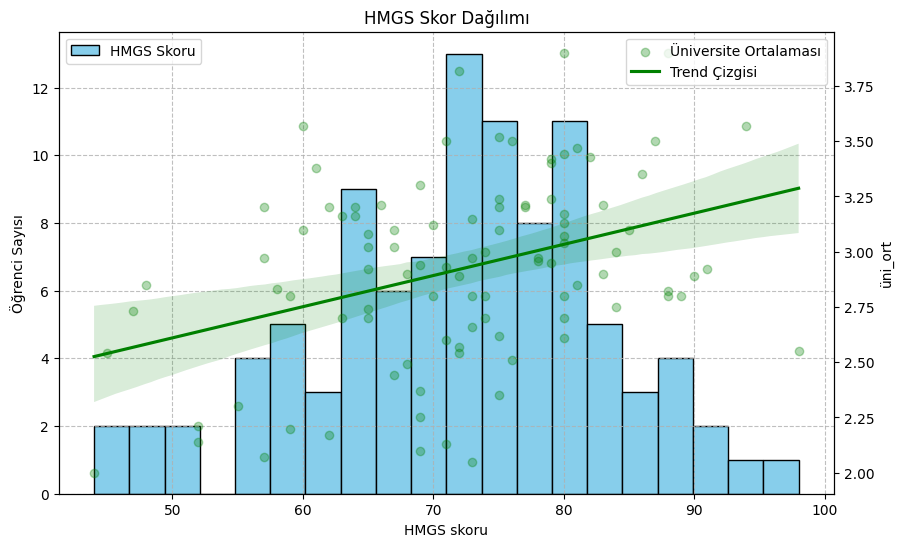

In [1153]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.hist(df['hmgs'], bins=20, edgecolor='black', color='skyblue', label='HMGS Skoru')
ax1.set_xlabel('HMGS skoru')
ax1.set_ylabel('Öğrenci Sayısı')
ax1.set_title('HMGS Skor Dağılımı')
ax1.grid(True, linestyle='--', alpha=0.8)

ax2 = ax1.twinx()
ax2.scatter(df['hmgs'], df['üni_ort'], color='green', label='Üniversite Ortalaması', alpha=0.3)
ax2.set_ylabel('Üniversite Ortalaması')

sns.regplot(x=df["hmgs"], y=df["üni_ort"], color="green", ax=ax2, scatter=False, label="Trend Çizgisi")

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

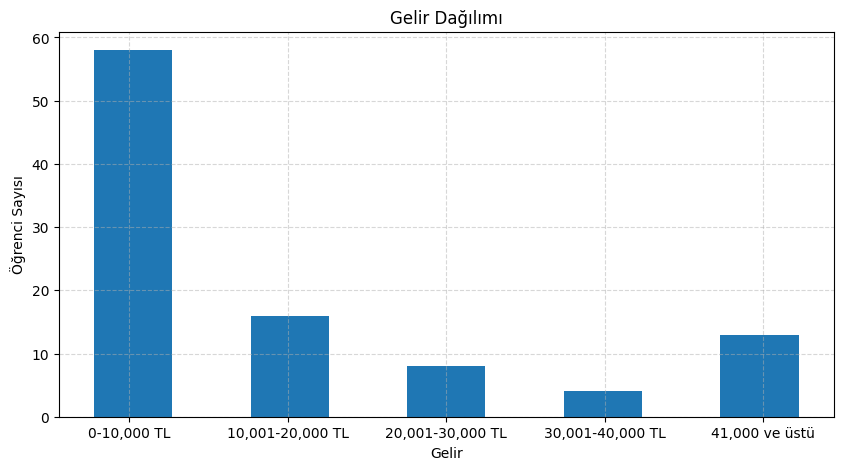

In [1154]:
df.gelir.hist(figsize=(10,5), bins=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Gelir')
plt.xticks(ticks=[0.2, 1.1, 2, 2.9, 3.8], ha='center')
plt.ylabel('Öğrenci Sayısı')
plt.title('Gelir Dağılımı')
plt.show()

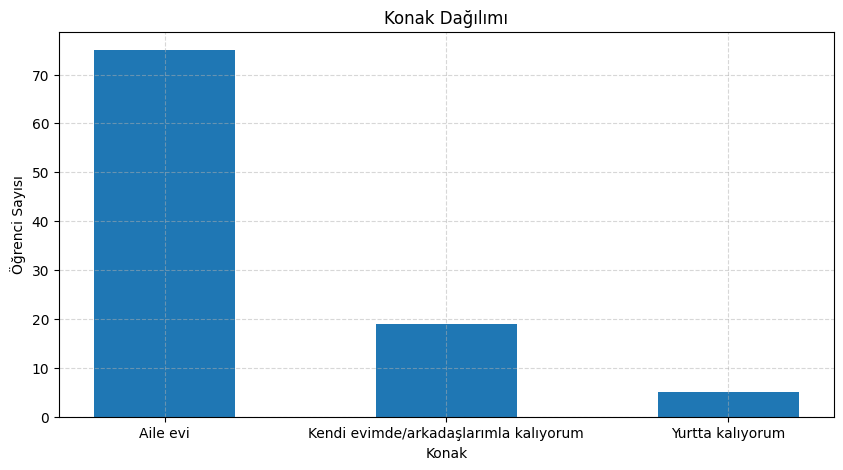

In [1155]:
df.konak.hist(figsize=(10,5), bins=5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Konak')
plt.xticks(ticks=[0.2, 1, 1.8], ha="center")
plt.ylabel('Öğrenci Sayısı')
plt.title('Konak Dağılımı')
plt.show()

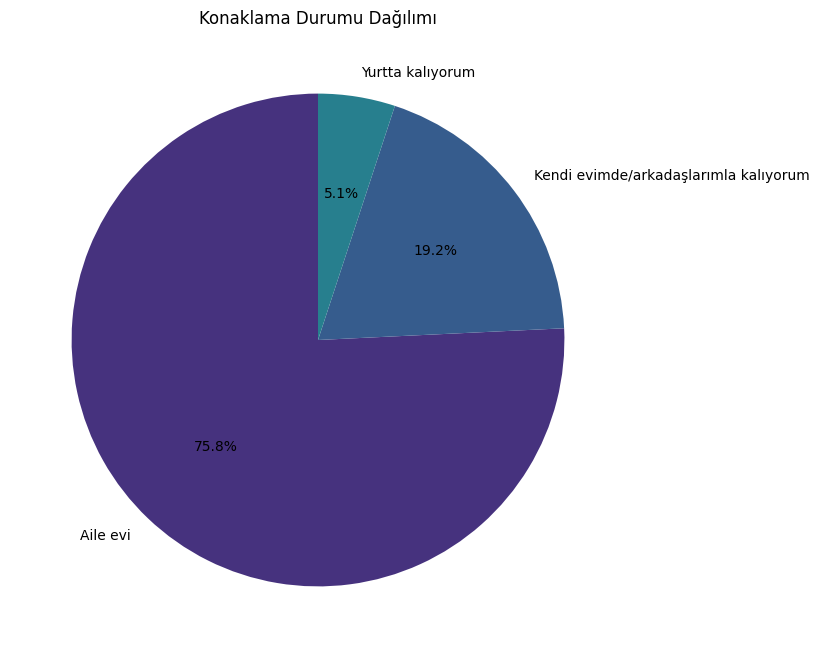

In [1156]:
df['konak'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=sns.color_palette('viridis'))
plt.title('Konaklama Durumu Dağılımı')
plt.ylabel('')
plt.show()

In [1157]:
evet_gecemedi = len(df[(df["birden_fazla_ay"] == "Evet") & (df["gecer"] == "Geçemedi")])
hayır_gecemedi = len(df[(df["birden_fazla_ay"] == "Hayır") & (df["gecer"] == "Geçemedi")])
evet_gecti = len(df[(df["birden_fazla_ay"] == "Evet") & (df["gecer"] == "Geçti")])
hayır_gecti = len(df[(df["birden_fazla_ay"] == "Hayır") & (df["gecer"] == "Geçti")])

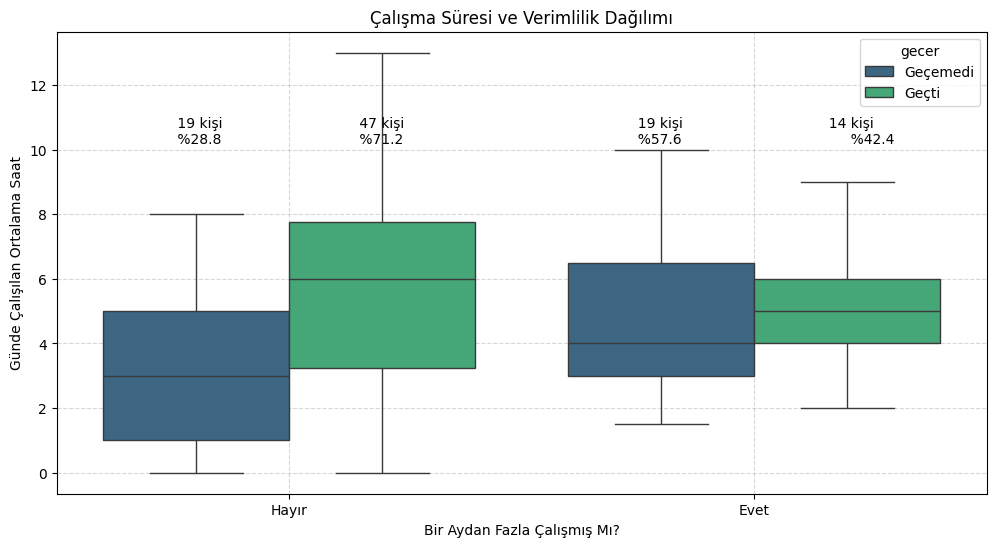

In [1158]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='birden_fazla_ay', y='calisma', hue="gecer", palette="viridis")
plt.xlabel('Bir Aydan Fazla Çalışmış Mı?')
plt.ylabel('Günde Çalışılan Ortalama Saat')
plt.title('Çalışma Süresi ve Verimlilik Dağılımı')
plt.text(-0.25,10.2,f" {evet_gecemedi} kişi\n %{round(evet_gecemedi*100/(evet_gecemedi+evet_gecti),1)}")
plt.text(0.14,10.2,f" {evet_gecti} kişi\n %{round(evet_gecti*100/(evet_gecti+evet_gecemedi),1)}")
plt.text(0.73,10.2,f"  {hayır_gecemedi} kişi\n  %{round(hayır_gecemedi*100/(hayır_gecti+hayır_gecemedi),1)}")
plt.text(1.14,10.2,f"  {hayır_gecti} kişi\n       %{round(hayır_gecti*100/(hayır_gecemedi+hayır_gecti),1)}")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

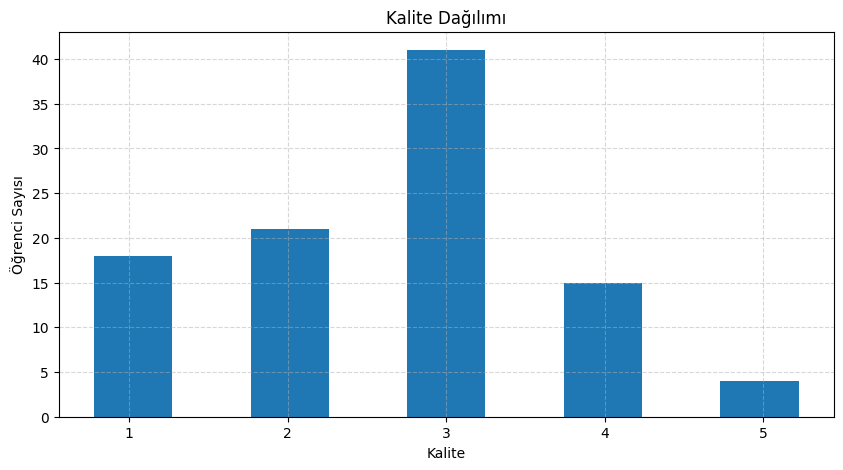

In [1159]:
df.kalite.hist(figsize=(10,5), bins=9)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Kalite')
plt.xticks(ticks=[1.2, 2.1, 3, 3.9, 4.8], labels=['1', '2', '3',"4","5"], ha='center')
plt.ylabel('Öğrenci Sayısı')
plt.title('Kalite Dağılımı')
plt.show()

In [1160]:
df.loc[df["üni"].str.contains("okan"), "üni_ing"]="%0"

In [1161]:
df.loc[df["üni"].str.contains("okan"), "üni_ing"]

,üni_ing
36,%0
72,%0


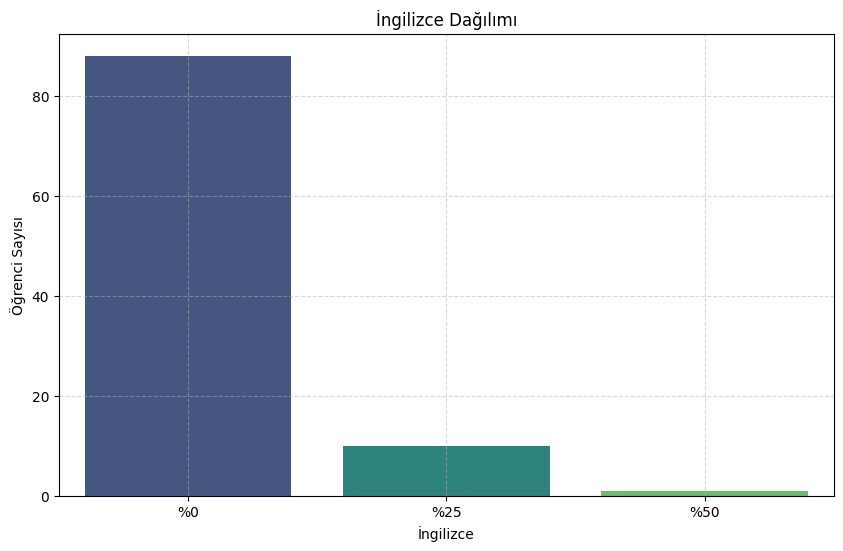

In [1162]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='üni_ing', palette="viridis")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('İngilizce')
plt.ylabel('Öğrenci Sayısı')
plt.title('İngilizce Dağılımı')
plt.show()

In [1163]:
for i in df["üni"]:
  df["üni"] = df["üni"].str.replace("üniversitesi","")

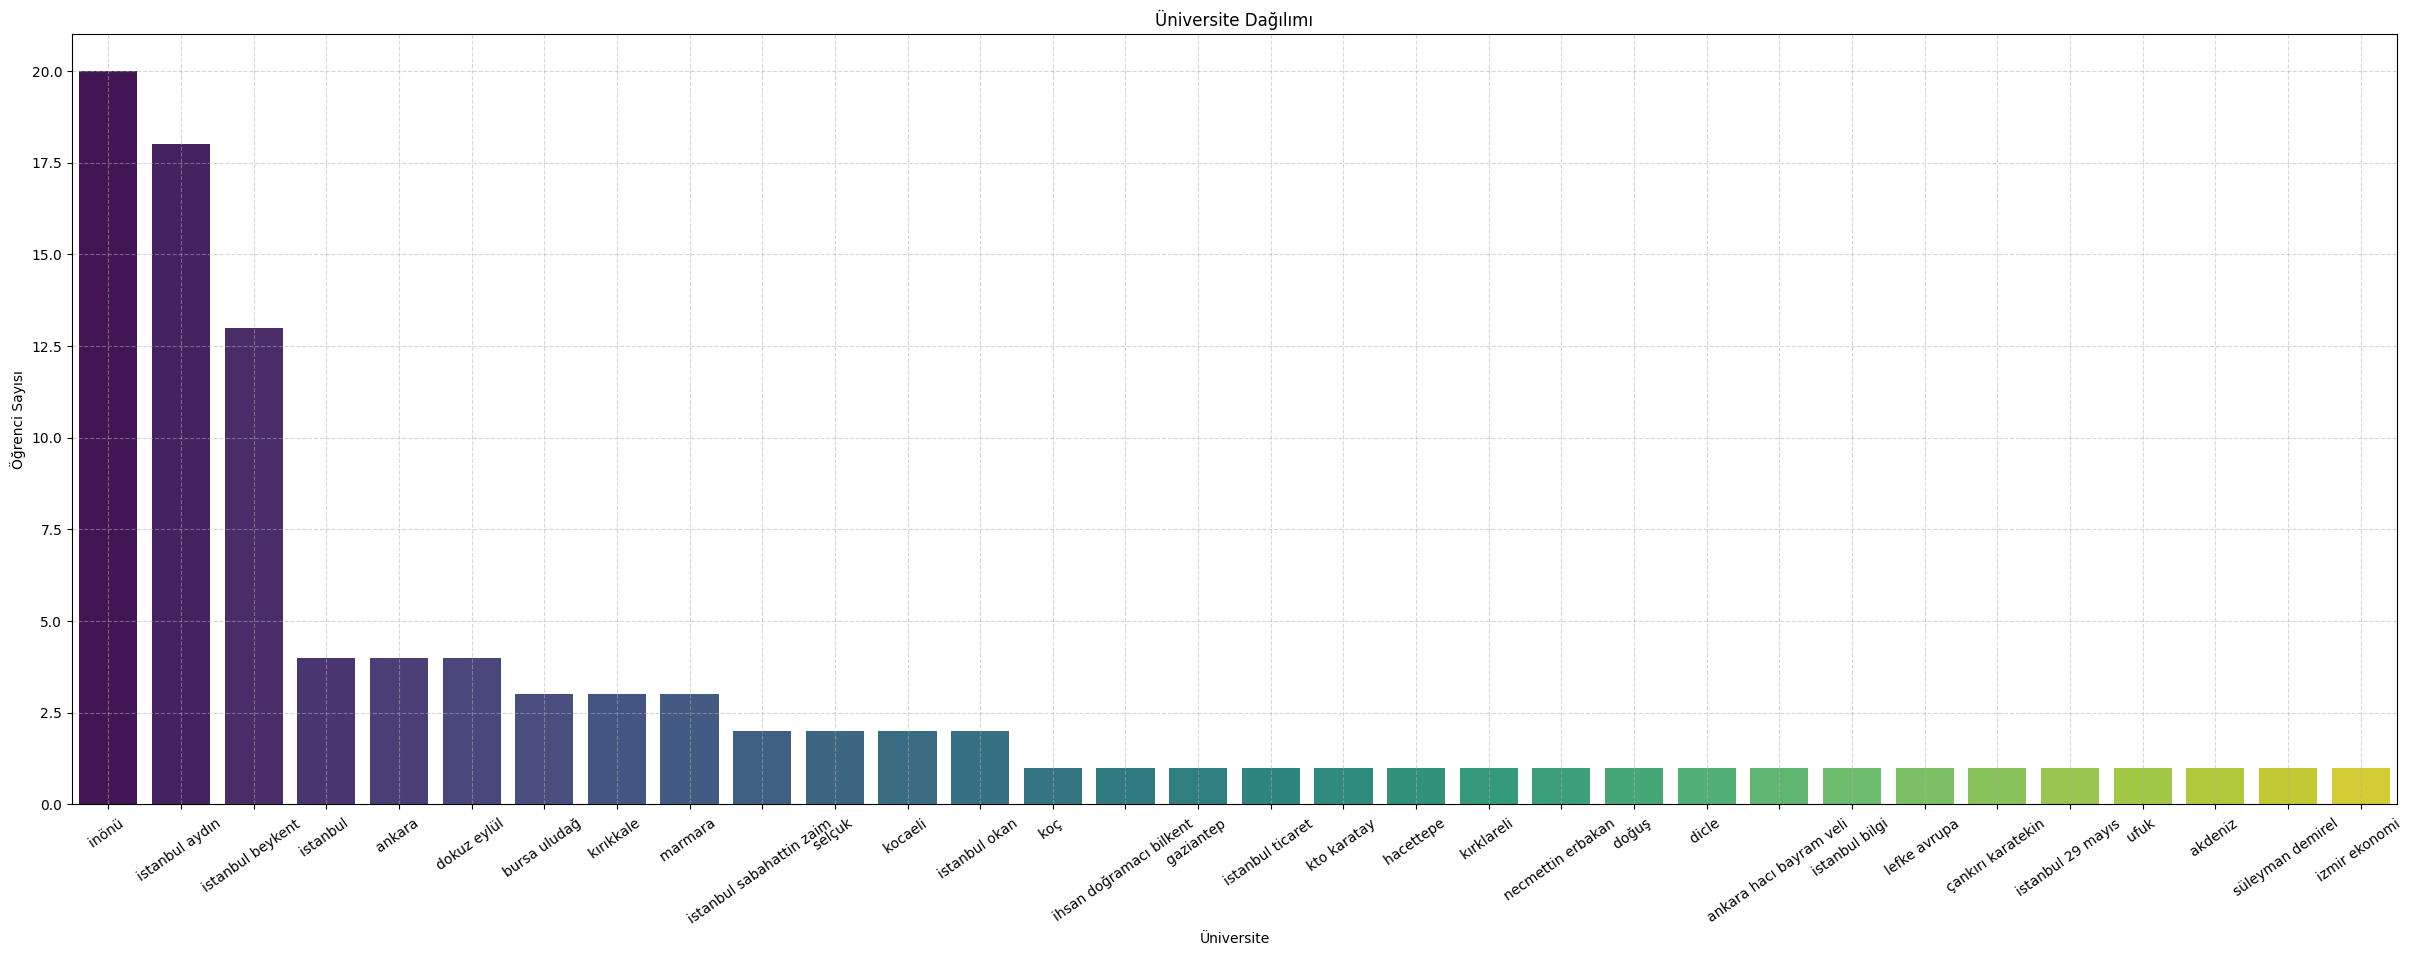

In [1164]:
plt.figure(figsize=(30, 10)),
sns.countplot(x='üni', data=df, order=df['üni'].value_counts().index, palette="viridis")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Üniversite')
plt.xticks(rotation=35)
plt.ylabel('Öğrenci Sayısı')
plt.title('Üniversite Dağılımı')
plt.show()

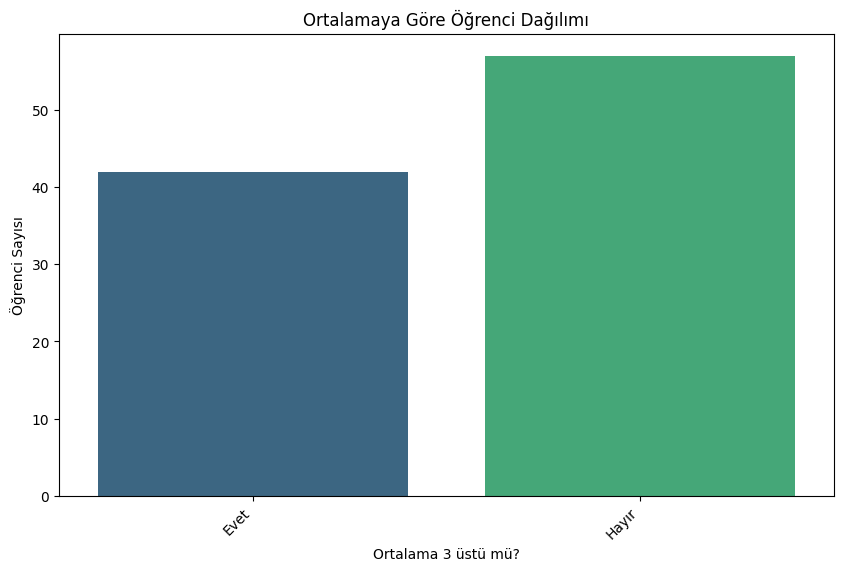

In [1165]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ort_yüksek_mi', data=df, order=df['ort_yüksek_mi'].value_counts(ascending = True).index, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ortalama 3 üstü mü?')
plt.ylabel('Öğrenci Sayısı')
plt.title('Ortalamaya Göre Öğrenci Dağılımı')
plt.show()

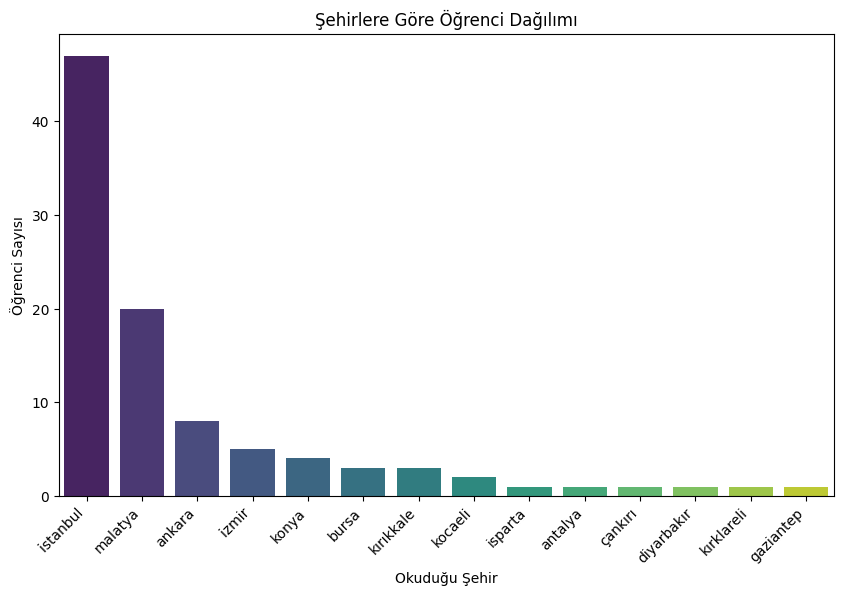

In [1166]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Şehir', data=df, order=df['Şehir'].value_counts().index, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Okuduğu Şehir')
plt.ylabel('Öğrenci Sayısı')
plt.title('Şehirlere Göre Öğrenci Dağılımı')
plt.show()

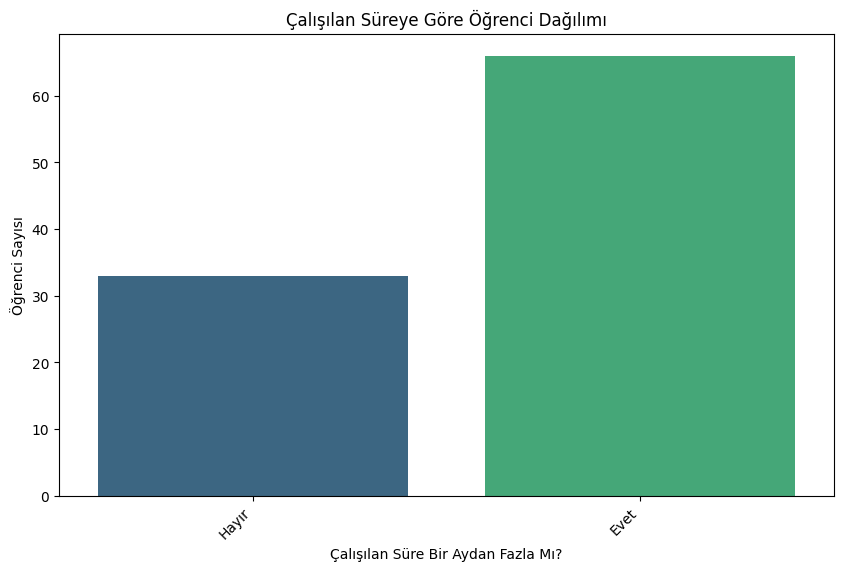

In [1167]:
plt.figure(figsize=(10, 6))
sns.countplot(x='birden_fazla_ay', data=df, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Çalışılan Süre Bir Aydan Fazla Mı?')
plt.ylabel('Öğrenci Sayısı')
plt.title('Çalışılan Süreye Göre Öğrenci Dağılımı')
plt.show()

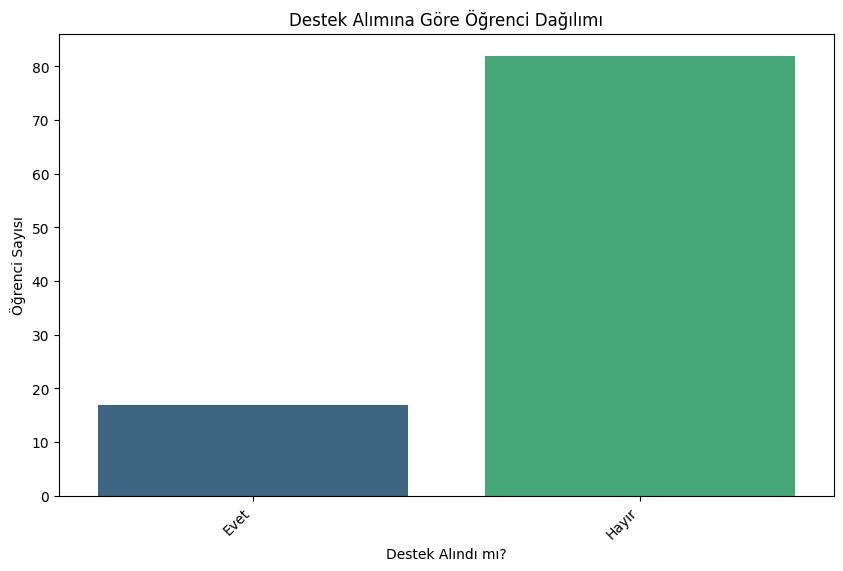

In [1168]:
plt.figure(figsize=(10, 6))
sns.countplot(x='destek_var_mi', data=df, order=df['destek_var_mi'].value_counts(ascending = True ).index, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Destek Alındı mı?')
plt.ylabel('Öğrenci Sayısı')
plt.title('Destek Alımına Göre Öğrenci Dağılımı')
plt.show()

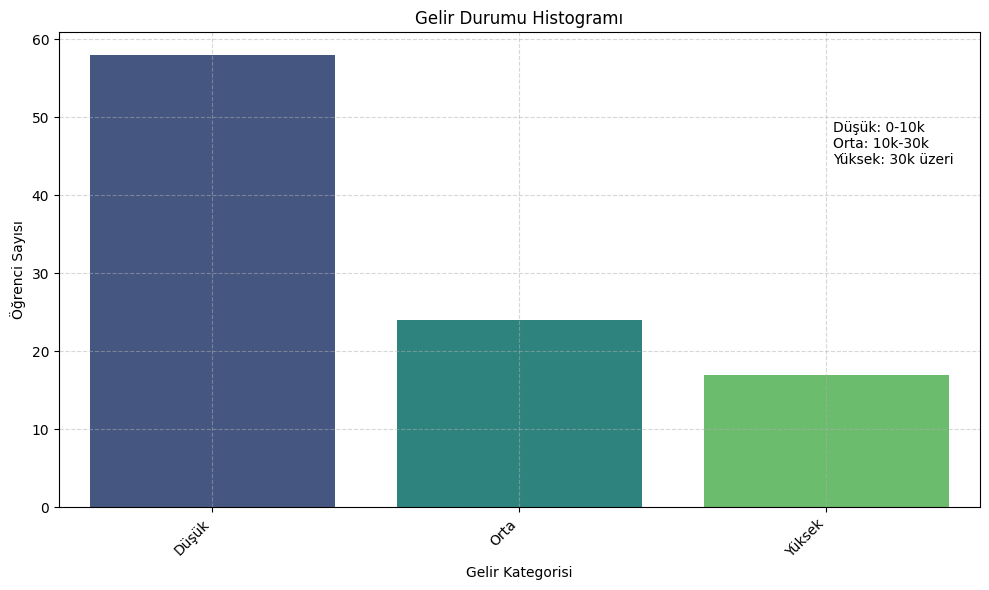

In [1169]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gelir_durumu', data=df, order=df['gelir_durumu'].value_counts().index, palette="viridis")
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Öğrenci Sayısı')
plt.title('Gelir Durumu Histogramı')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(2.02,44,"Düşük: 0-10k\nOrta: 10k-30k\nYüksek: 30k üzeri")
plt.tight_layout()
plt.show()

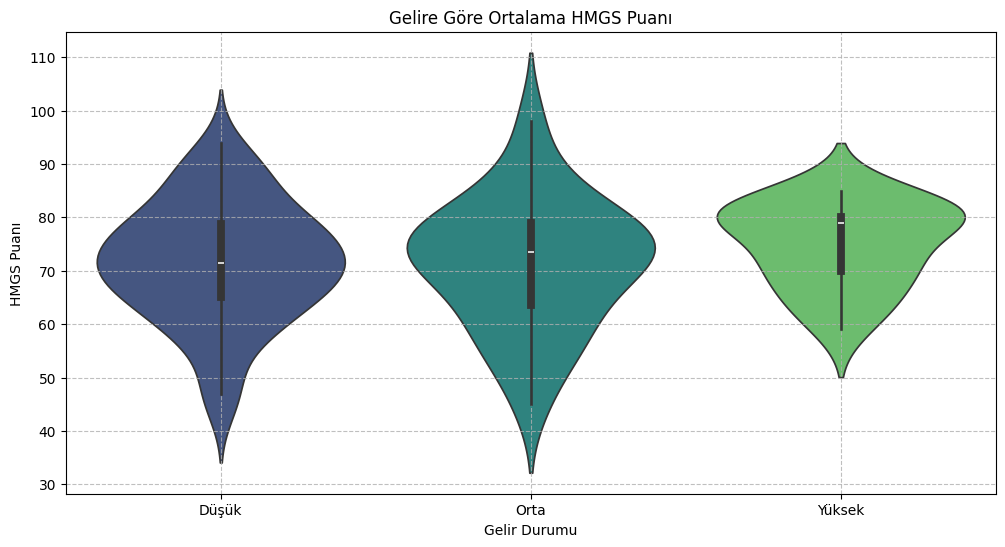

In [1170]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='gelir_durumu', y="hmgs", palette="viridis")
plt.xlabel('Gelir Durumu')
plt.ylabel('HMGS Puanı')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Gelire Göre Ortalama HMGS Puanı')
plt.show()

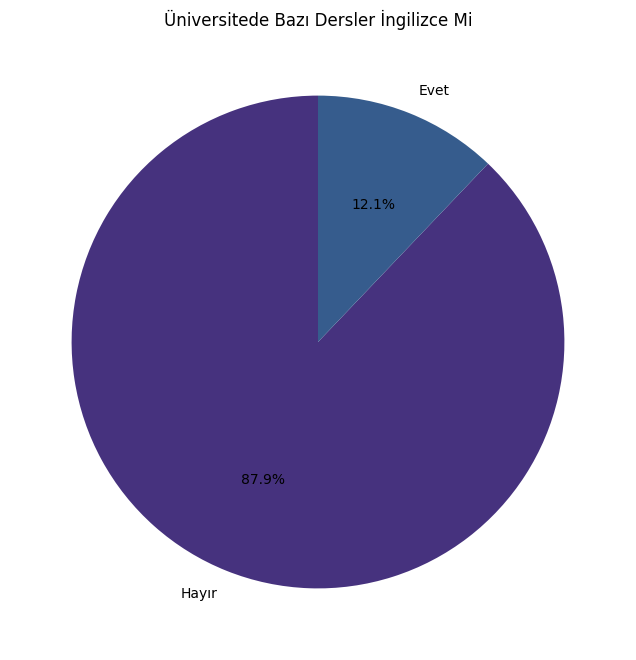

In [1171]:
df['üni_ing_mi'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colors=sns.color_palette('viridis'))
plt.title('Üniversitede Bazı Dersler İngilizce Mi')
plt.ylabel('')
plt.show()

<Figure size 4000x1000 with 0 Axes>

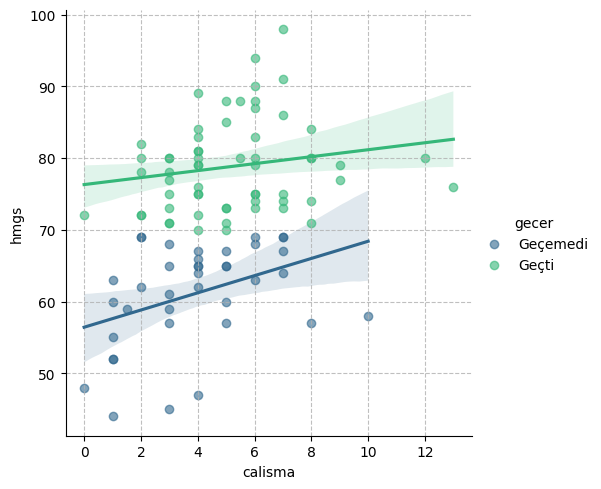

In [1172]:
plt.figure(figsize=(40, 10))
sns.lmplot(data=df, x="calisma", y="hmgs", hue="gecer", scatter_kws={"alpha": 0.6}, palette="viridis")
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

<Figure size 4000x1000 with 0 Axes>

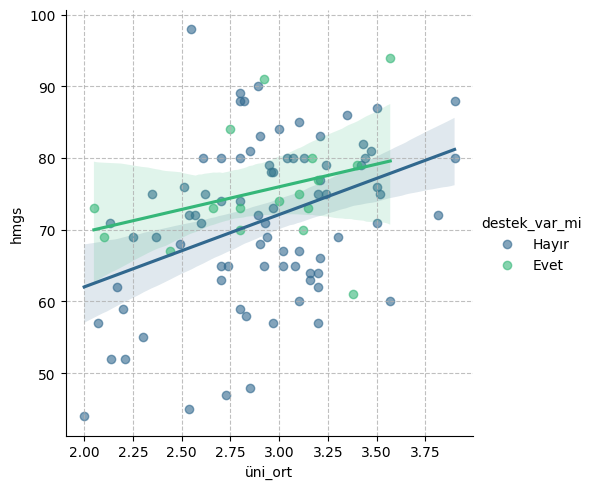

In [1173]:
# Topladığım datada sınav zamanı dershaneye giden az kişi de olsa
# üniversite ortalaması ve destek alınıp alınmaması sınavda alınan puanın yükselmesine Ciddi anlamda etki ediyor.

plt.figure(figsize=(40, 10))
sns.lmplot(data=df, x="üni_ort", y="hmgs", hue="destek_var_mi", scatter_kws={"alpha": 0.6}, palette="viridis")
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

In [1174]:
desyok_gecti = len(df[(df["destek_var_mi"] == "Hayır") & (df["gecer"] == "Geçti")])
desyok_gecemedi = len(df[(df["destek_var_mi"] == "Hayır") & (df["gecer"] == "Geçemedi")])
desvar_gecti = len(df[(df["destek_var_mi"] == "Evet") & (df["gecer"] == "Geçti")])
desvar_gecemedi = len(df[(df["destek_var_mi"] == "Evet") & (df["gecer"] == "Geçemedi")])

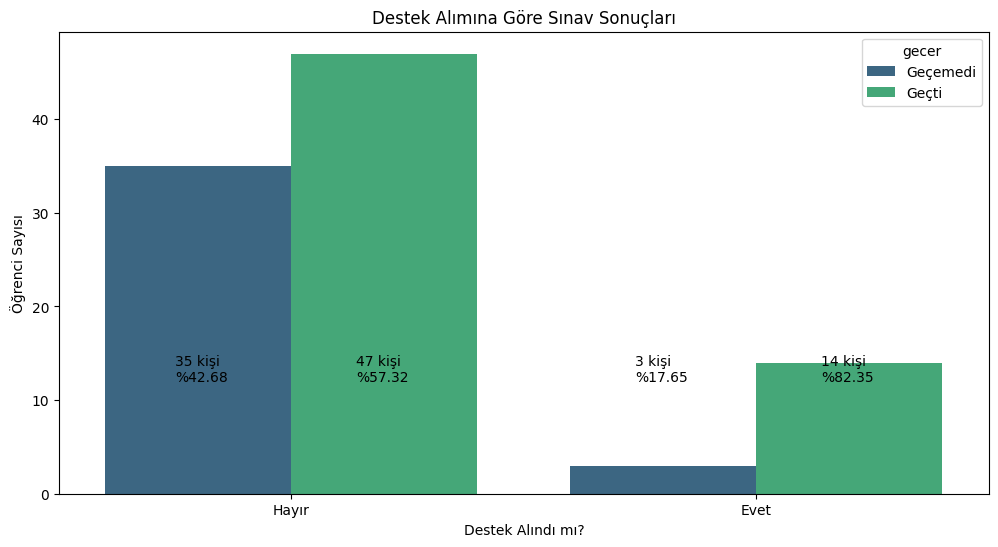

In [1175]:
# Destek alan öğrencilerin (Özel Ders, Dershane) sınav notları ile destek almayan öğrencilerin
# notları arasında net bir fark var. Destek alanların %85'i sınavı geçerken destek almayanların ise
# sadece % 60'ı sınavı geçebildi.

plt.figure(figsize=(12, 6))
sns.countplot(x='destek_var_mi', hue='gecer', data=df, palette="viridis")
plt.xlabel('Destek Alındı mı?')
plt.ylabel('Öğrenci Sayısı')
plt.text(-0.25,12,f"{desyok_gecemedi} kişi\n%{round(desyok_gecemedi*100/(desyok_gecemedi+desyok_gecti),2)}")
plt.text(0.14,12,f"{desyok_gecti} kişi\n%{round(desyok_gecti*100/(desyok_gecti+desyok_gecemedi),2)}")
plt.text(0.74,12,f"{desvar_gecemedi} kişi\n%{round(desvar_gecemedi*100/(desvar_gecti+desvar_gecemedi),2)}")
plt.text(1.14,12,f"{desvar_gecti} kişi\n%{round(desvar_gecti*100/(desvar_gecemedi+desvar_gecti),2)}")
plt.title('Destek Alımına Göre Sınav Sonuçları')
plt.show()

<Figure size 4000x1000 with 0 Axes>

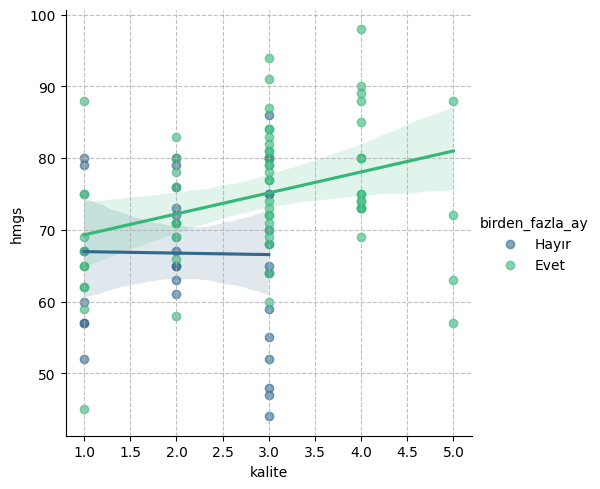

In [1176]:
# Bir aydan fazla çalışanlar hmgs notu arttıkça sınavın kaliteli olduğunu düşünme eğiliminde
# Bir aydan az çalışanları ise hmgs notları etkilemiyor her türlü sınavın kalitesiz olduğunu düşünüyorlar

plt.figure(figsize=(40, 10))
sns.lmplot(data=df, x="kalite", y="hmgs", hue="birden_fazla_ay", scatter_kws={"alpha": 0.6}, palette="viridis")
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

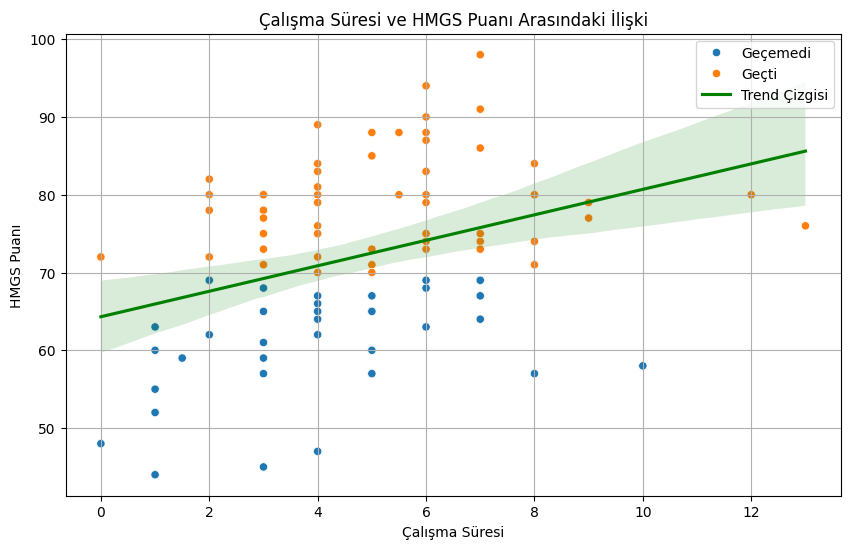

In [1177]:
# Sınava günlük ortalama kaç saat çalıştığın çok fazla etkiliyor. Sınava günde 3 saatten fazla çalışanlar 70 notunu geçme eğiliminde
# bu da sınavı geçilebilir kılıyor.

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calisma', y='hmgs', hue='gecer')
sns.regplot(data=df, x='calisma', y='hmgs', scatter=False, color='green', label="Trend Çizgisi")
plt.xlabel('Çalışma Süresi')
plt.ylabel('HMGS Puanı')
plt.title('Çalışma Süresi ve HMGS Puanı Arasındaki İlişki')
plt.legend()
plt.grid(True)
plt.show()

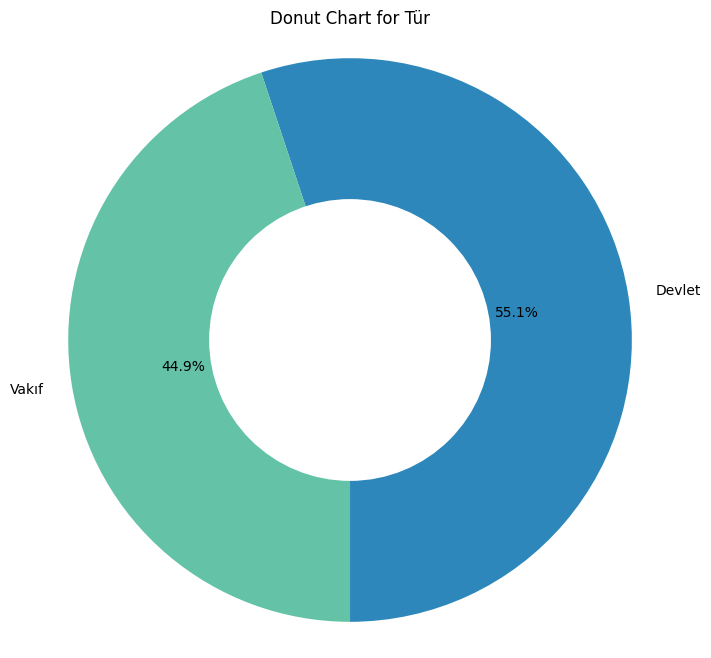

In [1178]:
plt.figure(figsize=(8, 8))
df["Tür"].value_counts().plot.pie(autopct='%1.1f%%', startangle=270,colors=["#2D87BB","#64C2A6"])
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Donut Chart for Tür')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel('')
plt.show()

In [1179]:
gelir_int = []

for i in df["gelir"]:
  if i == "0-10,000 TL":
    gelir_int.append(1)
  elif i == "10,001-20,000 TL":
    gelir_int.append(2)
  elif i == "20,001-30,000 TL":
    gelir_int.append(3)
  elif i == "30,001-40,000 TL":
    gelir_int.append(4)
  else:
    gelir_int.append(5)

df["gelir_int"] = gelir_int

In [1180]:
df[df["Tür"].isna()]

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,...,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi,birden_fazla_ay,kaliteli mi,gelir_durumu,Şehir,Tür,gelir_int
20,lefke avrupa,2.1,%25,69,Dershane aldım,yetki uzem,"0-10,000 TL",Aile evi,1-3 ay,7.0,...,Geçemedi,Hayır,Evet,Evet,Evet,Evet,Düşük,NaN,NaN,1


In [1181]:
df["üni"].unique()

array(['istanbul aydın ', 'istanbul ', 'marmara ', 'süleyman demirel ',
       'akdeniz ', 'ufuk ', 'istanbul beykent ', 'bursa uludağ ',
       'inönü ', 'kırıkkale ', 'ankara ', 'istanbul sabahattin zaim ',
       'istanbul 29 mayıs ', 'selçuk ', 'çankırı karatekin ',
       'lefke avrupa ', 'doğuş ', 'istanbul bilgi ',
       'ankara hacı bayram veli ', 'dicle ', 'dokuz eylül ',
       'istanbul ticaret ', 'necmettin erbakan ', 'istanbul okan ',
       'kırklareli ', 'hacettepe ', 'kocaeli ', 'kto karatay ', 'koç ',
       'ihsan doğramacı bilkent ', 'gaziantep ', 'izmir ekonomi '],
      dtype=object)

In [1182]:
for i in range(len(df.üni)):
    if "lefke avrupa" in df["üni"][i]:
        df["Tür"][i] = "Vakıf"

In [1183]:
df[df["Tür"].isnull()]

,üni,üni_ort,üni_ing,hmgs,destek,dershane_adı,gelir,konak,süre,calisma,...,gecer,ort_yüksek_mi,destek_var_mi,üni_ing_mi,birden_fazla_ay,kaliteli mi,gelir_durumu,Şehir,Tür,gelir_int


In [1184]:
tür_int = []

for i in df["Tür"]:
  if i == "Devlet":
    tür_int.append(1)
  elif i == "Vakıf":
    tür_int.append(2)

df["tür_int"] = tür_int

In [1185]:
df["konak"].unique()

array(['Aile evi', 'Kendi evimde/arkadaşlarımla kalıyorum',
       'Yurtta kalıyorum'], dtype=object)

In [1186]:
konak_int = []

for i in df["konak"]:
  if i == "Aile evi":
    konak_int.append(1)
  elif i == 'Yurtta kalıyorum':
    konak_int.append(2)
  elif i == 'Kendi evimde/arkadaşlarımla kalıyorum':
    konak_int.append(3)

df["konak_int"] = konak_int

In [1187]:
birden_fazla_int = []

for i in df["birden_fazla_ay"]:
  if i == "Hayır":
    birden_fazla_int.append(1)
  else:
    birden_fazla_int.append(2)

df["birden_fazla_int"] = birden_fazla_int

In [1188]:
df["destek_var_mi"].unique()

array(['Hayır', 'Evet'], dtype=object)

In [1189]:
destek_mi_int = []

for i in df["destek_var_mi"]:
  if i == "Hayır":
    destek_mi_int.append(0)
  else:
    destek_mi_int.append(1)

df["destek_mi_int"] = destek_mi_int

In [1190]:
df.columns

Index(['üni', 'üni_ort', 'üni_ing', 'hmgs', 'destek', 'dershane_adı', 'gelir',
       'konak', 'süre', 'calisma', 'kalite', 'gecer', 'ort_yüksek_mi',
       'destek_var_mi', 'üni_ing_mi', 'birden_fazla_ay', 'kaliteli mi',
       'gelir_durumu', 'Şehir', 'Tür', 'gelir_int', 'tür_int', 'konak_int',
       'birden_fazla_int', 'destek_mi_int'],
      dtype='object')

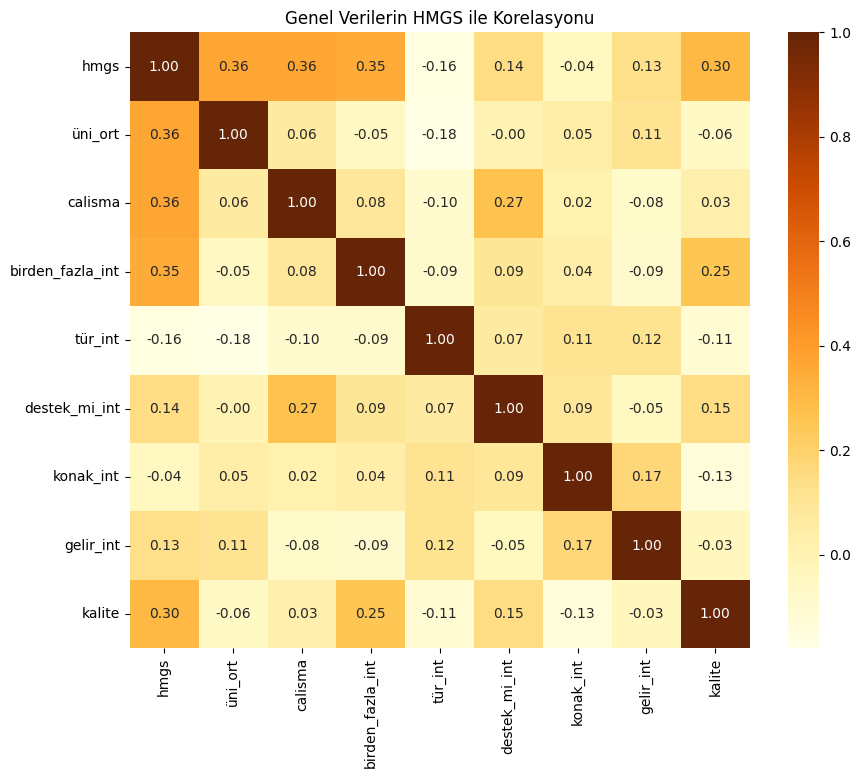

In [1191]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[["hmgs",'üni_ort','calisma',"birden_fazla_int","tür_int","destek_mi_int", "konak_int","gelir_int","kalite"]].corr(), annot=True, cmap='YlOrBr', fmt=".2f")
plt.title('Genel Verilerin HMGS ile Korelasyonu')
plt.show()

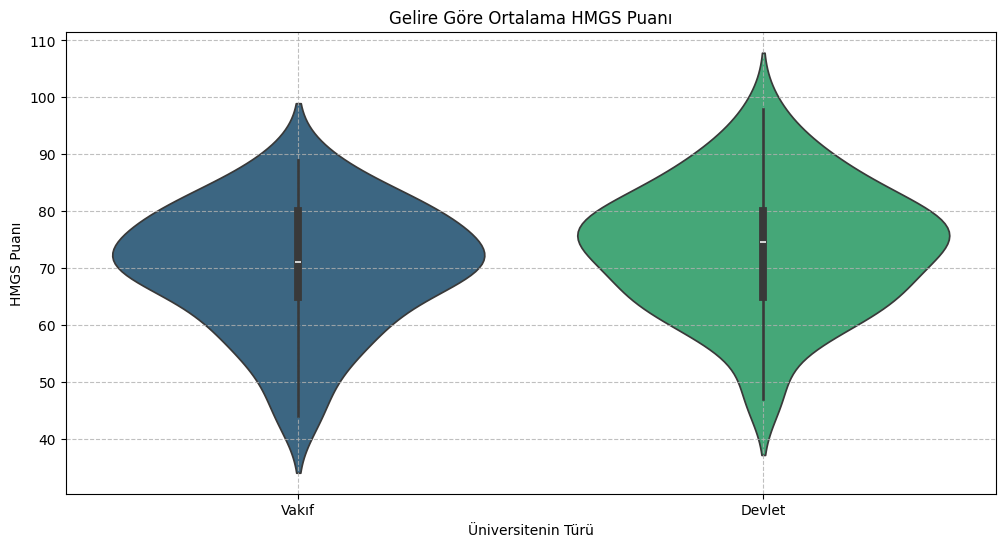

In [1192]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Tür', y="hmgs", palette="viridis")
plt.xlabel('Üniversitenin Türü')
plt.ylabel('HMGS Puanı')
plt.grid(True, linestyle='--', alpha=0.8)
plt.title('Gelire Göre Ortalama HMGS Puanı')
plt.show()

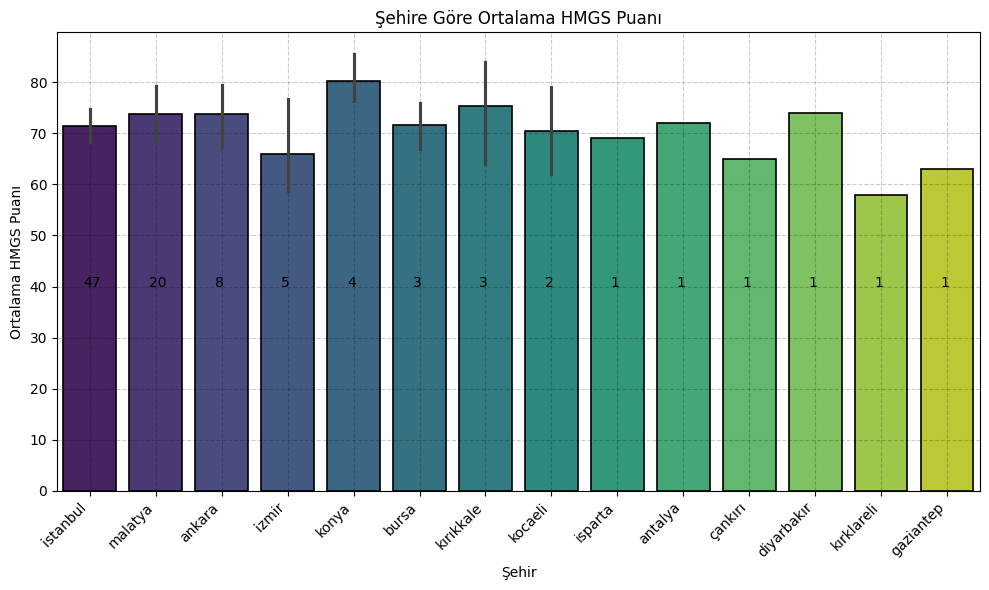

In [1193]:
sıra = df['Şehir'].value_counts().index

plt.figure(figsize=(10, 6))
sns.barplot(x='Şehir', y='hmgs', data=df, palette="viridis",width=0.8, edgecolor="black", linewidth=1.2, order=sıra)
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri döndür
plt.xlabel('Şehir')
plt.ylabel('Ortalama HMGS Puanı')
plt.text(-0.1,40,f"{len(df[df['Şehir']==sıra[0]])}")
plt.text(0.9,40,f"{len(df[df['Şehir']==sıra[1]])}")
plt.text(1.9,40,f"{len(df[df['Şehir']==sıra[2]])}")
plt.text(2.9,40,f"{len(df[df['Şehir']==sıra[3]])}")
plt.text(3.9,40,f"{len(df[df['Şehir']==sıra[4]])}")
plt.text(4.9,40,f"{len(df[df['Şehir']==sıra[5]])}")
plt.text(5.9,40,f"{len(df[df['Şehir']==sıra[6]])}")
plt.text(6.9,40,f"{len(df[df['Şehir']==sıra[7]])}")
plt.text(7.9,40,f"{len(df[df['Şehir']==sıra[8]])}")
plt.text(8.9,40,f"{len(df[df['Şehir']==sıra[9]])}")
plt.text(9.9,40,f"{len(df[df['Şehir']==sıra[10]])}")
plt.text(10.9,40,f"{len(df[df['Şehir']==sıra[11]])}")
plt.text(11.9,40,f"{len(df[df['Şehir']==sıra[12]])}")
plt.text(12.9,40,f"{len(df[df['Şehir']==sıra[13]])}")
plt.grid(True, linestyle='--', alpha=0.2, color="black")
plt.title('Şehire Göre Ortalama HMGS Puanı')
plt.tight_layout()  # Grafiğin düzgün bir şekilde görüntülenmesini sağlar
plt.show()

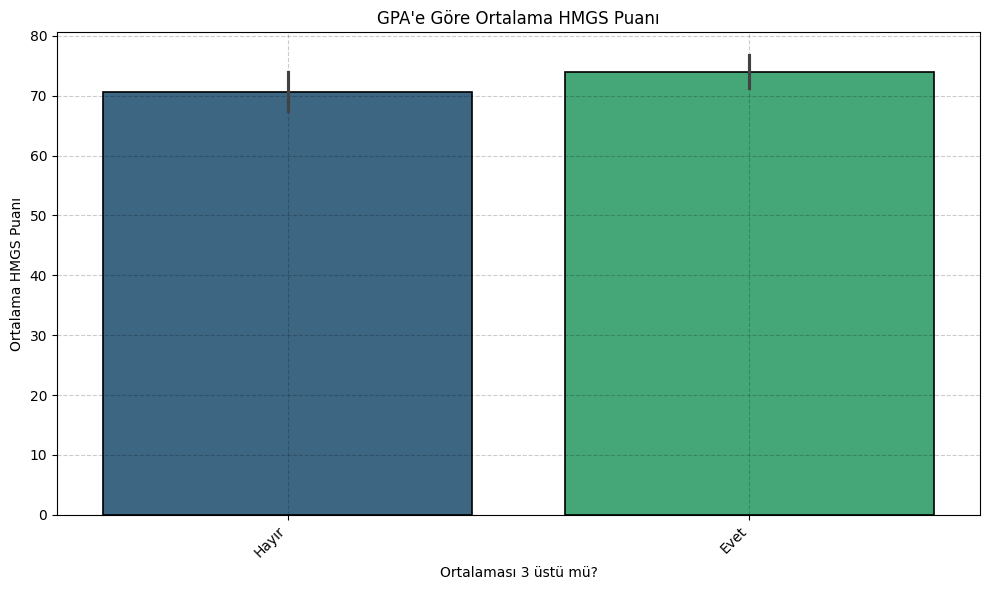

In [1194]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ort_yüksek_mi', y='hmgs', data=df, palette="viridis",width=0.8, edgecolor="black", linewidth=1.2)
plt.xticks(rotation=45, ha='right')  # X eksenindeki etiketleri döndür
plt.xlabel('Ortalaması 3 üstü mü?')
plt.ylabel('Ortalama HMGS Puanı')
plt.grid(True, linestyle='--', alpha=0.2, color="black")
plt.title('GPA\'e Göre Ortalama HMGS Puanı')
plt.tight_layout()  # Grafiğin düzgün bir şekilde görüntülenmesini sağlar
plt.show()

<Figure size 2000x600 with 0 Axes>

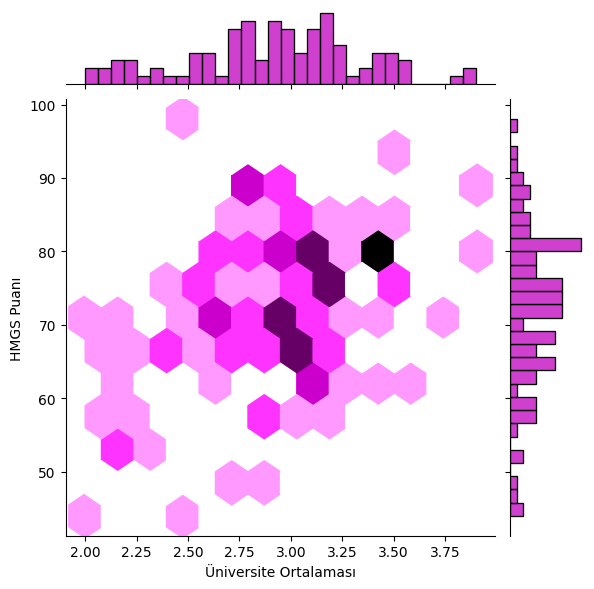

In [1195]:
plt.figure(figsize=(20, 6))
sns.jointplot(x=df["üni_ort"], y=df["hmgs"], kind='hex', color="m",
              joint_kws=dict(gridsize=12),
              marginal_kws=dict(bins=30, fill=True))
plt.xlabel('Üniversite Ortalaması')
plt.ylabel('HMGS Puanı')
plt.show()

In [1196]:
for i in df.columns:
  print(f"Sütun adı: {df[i].name}" "\n------------------", type(df[i][0]))

Sütun adı: üni
------------------ <class 'str'>
Sütun adı: üni_ort
------------------ <class 'numpy.float64'>
Sütun adı: üni_ing
------------------ <class 'str'>
Sütun adı: hmgs
------------------ <class 'numpy.int64'>
Sütun adı: destek
------------------ <class 'str'>
Sütun adı: dershane_adı
------------------ <class 'str'>
Sütun adı: gelir
------------------ <class 'str'>
Sütun adı: konak
------------------ <class 'str'>
Sütun adı: süre
------------------ <class 'str'>
Sütun adı: calisma
------------------ <class 'numpy.float64'>
Sütun adı: kalite
------------------ <class 'numpy.int64'>
Sütun adı: gecer
------------------ <class 'str'>
Sütun adı: ort_yüksek_mi
------------------ <class 'str'>
Sütun adı: destek_var_mi
------------------ <class 'str'>
Sütun adı: üni_ing_mi
------------------ <class 'str'>
Sütun adı: birden_fazla_ay
------------------ <class 'str'>
Sütun adı: kaliteli mi
------------------ <class 'str'>
Sütun adı: gelir_durumu
------------------ <class 'str'>
Sütun adı

# Machine Learning

In [1197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   üni               99 non-null     object  
 1   üni_ort           99 non-null     float64 
 2   üni_ing           99 non-null     object  
 3   hmgs              99 non-null     int64   
 4   destek            99 non-null     object  
 5   dershane_adı      99 non-null     object  
 6   gelir             99 non-null     category
 7   konak             99 non-null     object  
 8   süre              99 non-null     object  
 9   calisma           99 non-null     float64 
 10  kalite            99 non-null     int64   
 11  gecer             99 non-null     object  
 12  ort_yüksek_mi     99 non-null     object  
 13  destek_var_mi     99 non-null     object  
 14  üni_ing_mi        99 non-null     object  
 15  birden_fazla_ay   99 non-null     object  
 16  kaliteli mi       99 non-nul

In [1198]:
konak_genel = []

for i in df.konak_int:
  if i == 1:
    konak_genel.append("Aile evi")
  elif i == 2:
    konak_genel.append("Aile evi değil")
  else:
    konak_genel.append("Aile evi değil")

df["konak_genel"] = konak_genel

In [1406]:
gecer_int = []

for i in df.gecer:
  if i == "Geçti":
    gecer_int.append(1)
  else:
    gecer_int.append(0)

df["gecer_int"] = gecer_int

In [1407]:
df.gecer_int.value_counts()

,count
gecer_int,
1,61
0,38


In [1408]:
df.konak_genel.value_counts()

,count
konak_genel,
Aile evi,75
Aile evi değil,24


In [1409]:
df.üni_ing_mi.value_counts()

,count
üni_ing_mi,
Hayır,87
Evet,12


In [1486]:
ml_df = df.copy()

In [1487]:
ml_df = ml_df[["gecer_int", "üni_ort", "gelir_durumu", "konak_genel", "calisma","birden_fazla_int","üni_ing_mi","tür_int"]]

In [1488]:
x = ml_df.drop("gecer_int", axis=1)
y = ml_df["gecer_int"]

In [1489]:
le = LabelEncoder()

x_categorical = x.select_dtypes(include=['object'])
x_numerical = x.select_dtypes(exclude=['object'])

label_encoders = {}
x_categorical_encoded = x_categorical.copy()  # Orijinal DataFrame'i koruyoruz

for col in x_categorical.columns:
    le = LabelEncoder()
    x_categorical_encoded[col] = le.fit_transform(x_categorical[col])
    label_encoders[col] = le  # Encoder'ı saklıyoruz

x = pd.concat([x_numerical, x_categorical_encoded], axis=1)

In [1490]:
x_name = x.columns

In [1491]:
s = StandardScaler()
x = s.fit_transform(x)

In [1493]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.001, random_state=42)

In [1494]:
from sklearn.ensemble import RandomForestClassifier

In [1495]:
regressor = RandomForestClassifier(n_estimators=10, random_state=44, oob_score=True)
regressor.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, oob_score=True, random_state=44)

In [1496]:
y_pred = regressor.predict(x_test)

In [1497]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.6020408163265306


In [1498]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [1499]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1]]


In [1500]:
y_pred

array([1])

In [1501]:
np.array(y_test)

array([1])

In [1502]:
for i in ml_df:
  print("---", i, "---")
  print(ml_df[i].unique(), type(ml_df[i][0]))

--- gecer_int ---
[0 1] <class 'numpy.int64'>
--- üni_ort ---
[2.21  3.9   2.7   2.37  3.4   2.54  3.21  2.6   2.57  2.85  2.75  3.2
 3.47  2.25  3.13  3.57  2.82  2.74  2.1   2.66  3.02  3.5   2.07  2.8
 2.44  2.96  2.61  2.17  2.62  3.38  2.94  2.83  2.73  2.9   3.24  3.16
 2.89  3.3   2.13  2.92  3.1   2.97  2.    2.05  3.35  3.816 3.15  3.
 2.14  2.49  2.51  3.52  2.93  2.3   3.04  2.35  2.95  3.42  2.55  3.44
 2.2   3.08  3.12  3.17  3.43  3.07 ] <class 'numpy.float64'>
--- gelir_durumu ---
['Düşük' 'Orta' 'Yüksek'] <class 'str'>
--- konak_genel ---
['Aile evi' 'Aile evi değil'] <class 'str'>
--- calisma ---
[ 1.   6.  12.   2.   9.   3.   4.   5.   0.   8.   7.  10.  13.   5.5
  1.5] <class 'numpy.float64'>
--- birden_fazla_int ---
[1 2] <class 'numpy.int64'>
--- üni_ing_mi ---
['Hayır' 'Evet'] <class 'str'>
--- tür_int ---
[2 1] <class 'numpy.int64'>


In [1503]:
label_encoders["üni_ing_mi"].inverse_transform([0,1])

array(['Evet', 'Hayır'], dtype=object)

In [1504]:
deneme_df.head(1)

,üni_ort,calisma,birden_fazla_int,tür_int,gelir_durumu,konak_genel,üni_ing_mi
0,2.5,1,2,2,0,1,0


In [1505]:
x_categorical.head(1)

,gelir_durumu,konak_genel,üni_ing_mi
0,Düşük,Aile evi,Hayır


In [1525]:
deneme = [2.36, 1.7, 2, 1, "Orta", "Aile evi değil", "Evet"]
deneme_df = pd.DataFrame([deneme], columns=["üni_ort","calisma","birden_fazla_int","tür_int","gelir_durumu","konak_genel","üni_ing_mi"])

for col in x_categorical.columns:
    deneme_df[col] = label_encoders[col].transform(deneme_df[col])

deneme_le_s = s.transform(deneme_df)

deneme_le_s = np.array(deneme_le_s)

if regressor.predict(deneme_le_s)==1:
  print("Sınavı geçer")
else:
  print("Sınavı geçemez")

Geçemedi
